# Decessi mediani

Decessi mediani nell'ultima settimana.

> Max Pierini

***

Fonte dati [Johns Hopkins University](https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Markdown

In [2]:
df = pd.read_csv(
    'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv',
    index_col=['Country/Region', 'Province/State']
).drop(['Lat', 'Long'], axis='columns')

In [3]:
c = df.groupby('Country/Region').sum()

In [4]:
ct = c.transpose()

In [5]:
ct.index = pd.to_datetime(ct.index)

In [6]:
ct.index.name = 'date'

In [7]:
ctd = ct.diff()

In [8]:
ctd_last_week = ctd.iloc[-7:]

In [9]:
ctd_last_week = ctd_last_week.melt()

In [10]:
ctd_last_week['median'] = 0

In [11]:
for i in ctd_last_week.index:
    country = ctd_last_week.loc[i]['Country/Region']
    med = ctd_last_week[ctd_last_week["Country/Region"]==country].median().value
    ctd_last_week.loc[i, 'median'] = med

In [12]:
ctd_last_week['cat'] = pd.cut(
    ctd_last_week['median'], 
    bins=[-1,1,10,100,1000,np.inf],
    labels=[0, 10, 100, 1000, '1000+']
)

In [13]:
print("NAs check:")
ctd_last_week[ctd_last_week['cat'].isna()].sum()

NAs check:


Country/Region    0.0
value             0.0
median            0.0
cat               0.0
dtype: float64

***

# Maggiore di 0

In [14]:
_df_0 = ctd_last_week[ctd_last_week['cat']>0].sort_values(by='median')

In [15]:
perc = _df_0['Country/Region'].unique().size / ctd_last_week['Country/Region'].unique().size
display(Markdown(f"""
Nazioni: {_df_0['Country/Region'].unique().size} su {ctd_last_week['Country/Region'].unique().size}
({perc:.1%})
"""))


Nazioni: 106 su 192
(55.2%)


In [16]:
print("IN ORDINE per mediana:")
display(Markdown(
    _df_0.groupby('Country/Region')[['value']].median().sort_values(by='value').to_html()
))

IN ORDINE per mediana:


<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>value</th>
    </tr>
    <tr>
      <th>Country/Region</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Montenegro</th>
      <td>2.0</td>
    </tr>
    <tr>
      <th>Kazakhstan</th>
      <td>2.0</td>
    </tr>
    <tr>
      <th>Cyprus</th>
      <td>2.0</td>
    </tr>
    <tr>
      <th>Kyrgyzstan</th>
      <td>2.0</td>
    </tr>
    <tr>
      <th>Congo (Kinshasa)</th>
      <td>2.0</td>
    </tr>
    <tr>
      <th>Luxembourg</th>
      <td>2.0</td>
    </tr>
    <tr>
      <th>Mali</th>
      <td>2.0</td>
    </tr>
    <tr>
      <th>Mauritania</th>
      <td>2.0</td>
    </tr>
    <tr>
      <th>Ghana</th>
      <td>3.0</td>
    </tr>
    <tr>
      <th>Comoros</th>
      <td>3.0</td>
    </tr>
    <tr>
      <th>Kenya</th>
      <td>3.0</td>
    </tr>
    <tr>
      <th>Angola</th>
      <td>3.0</td>
    </tr>
    <tr>
      <th>Sri Lanka</th>
      <td>3.0</td>
    </tr>
    <tr>
      <th>Algeria</th>
      <td>4.0</td>
    </tr>
    <tr>
      <th>Rwanda</th>
      <td>4.0</td>
    </tr>
    <tr>
      <th>Cuba</th>
      <td>4.0</td>
    </tr>
    <tr>
      <th>Norway</th>
      <td>4.0</td>
    </tr>
    <tr>
      <th>Nepal</th>
      <td>5.0</td>
    </tr>
    <tr>
      <th>Albania</th>
      <td>5.0</td>
    </tr>
    <tr>
      <th>Estonia</th>
      <td>5.0</td>
    </tr>
    <tr>
      <th>Saudi Arabia</th>
      <td>5.0</td>
    </tr>
    <tr>
      <th>Namibia</th>
      <td>5.0</td>
    </tr>
    <tr>
      <th>Libya</th>
      <td>6.0</td>
    </tr>
    <tr>
      <th>Venezuela</th>
      <td>6.0</td>
    </tr>
    <tr>
      <th>Ethiopia</th>
      <td>6.0</td>
    </tr>
    <tr>
      <th>United Arab Emirates</th>
      <td>6.0</td>
    </tr>
    <tr>
      <th>Kosovo</th>
      <td>7.0</td>
    </tr>
    <tr>
      <th>Malaysia</th>
      <td>8.0</td>
    </tr>
    <tr>
      <th>Mozambique</th>
      <td>8.0</td>
    </tr>
    <tr>
      <th>Syria</th>
      <td>8.0</td>
    </tr>
    <tr>
      <th>Afghanistan</th>
      <td>8.0</td>
    </tr>
    <tr>
      <th>Belarus</th>
      <td>9.0</td>
    </tr>
    <tr>
      <th>Armenia</th>
      <td>9.0</td>
    </tr>
    <tr>
      <th>Dominican Republic</th>
      <td>9.0</td>
    </tr>
    <tr>
      <th>Iraq</th>
      <td>9.0</td>
    </tr>
    <tr>
      <th>El Salvador</th>
      <td>10.0</td>
    </tr>
    <tr>
      <th>Senegal</th>
      <td>10.0</td>
    </tr>
    <tr>
      <th>Uruguay</th>
      <td>11.0</td>
    </tr>
    <tr>
      <th>Bosnia and Herzegovina</th>
      <td>12.0</td>
    </tr>
    <tr>
      <th>Zambia</th>
      <td>12.0</td>
    </tr>
    <tr>
      <th>Azerbaijan</th>
      <td>12.0</td>
    </tr>
    <tr>
      <th>West Bank and Gaza</th>
      <td>13.0</td>
    </tr>
    <tr>
      <th>North Macedonia</th>
      <td>13.0</td>
    </tr>
    <tr>
      <th>Nigeria</th>
      <td>14.0</td>
    </tr>
    <tr>
      <th>Jordan</th>
      <td>14.0</td>
    </tr>
    <tr>
      <th>Paraguay</th>
      <td>14.0</td>
    </tr>
    <tr>
      <th>Burma</th>
      <td>14.0</td>
    </tr>
    <tr>
      <th>Honduras</th>
      <td>14.0</td>
    </tr>
    <tr>
      <th>Malawi</th>
      <td>15.0</td>
    </tr>
    <tr>
      <th>Costa Rica</th>
      <td>15.0</td>
    </tr>
    <tr>
      <th>Eswatini</th>
      <td>16.0</td>
    </tr>
    <tr>
      <th>Korea, South</th>
      <td>16.0</td>
    </tr>
    <tr>
      <th>Bangladesh</th>
      <td>16.0</td>
    </tr>
    <tr>
      <th>Moldova</th>
      <td>17.0</td>
    </tr>
    <tr>
      <th>Georgia</th>
      <td>17.0</td>
    </tr>
    <tr>
      <th>Serbia</th>
      <td>20.0</td>
    </tr>
    <tr>
      <th>Latvia</th>
      <td>20.0</td>
    </tr>
    <tr>
      <th>Slovenia</th>
      <td>26.0</td>
    </tr>
    <tr>
      <th>Greece</th>
      <td>27.0</td>
    </tr>
    <tr>
      <th>Croatia</th>
      <td>29.0</td>
    </tr>
    <tr>
      <th>Lithuania</th>
      <td>30.0</td>
    </tr>
    <tr>
      <th>Denmark</th>
      <td>32.0</td>
    </tr>
    <tr>
      <th>Morocco</th>
      <td>33.0</td>
    </tr>
    <tr>
      <th>Guatemala</th>
      <td>34.0</td>
    </tr>
    <tr>
      <th>Zimbabwe</th>
      <td>38.0</td>
    </tr>
    <tr>
      <th>Panama</th>
      <td>41.0</td>
    </tr>
    <tr>
      <th>Bolivia</th>
      <td>42.0</td>
    </tr>
    <tr>
      <th>Ecuador</th>
      <td>43.0</td>
    </tr>
    <tr>
      <th>Belgium</th>
      <td>44.0</td>
    </tr>
    <tr>
      <th>Israel</th>
      <td>46.0</td>
    </tr>
    <tr>
      <th>Pakistan</th>
      <td>47.0</td>
    </tr>
    <tr>
      <th>Bulgaria</th>
      <td>49.0</td>
    </tr>
    <tr>
      <th>Ireland</th>
      <td>50.0</td>
    </tr>
    <tr>
      <th>Austria</th>
      <td>51.0</td>
    </tr>
    <tr>
      <th>Lebanon</th>
      <td>53.0</td>
    </tr>
    <tr>
      <th>Egypt</th>
      <td>54.0</td>
    </tr>
    <tr>
      <th>Switzerland</th>
      <td>60.0</td>
    </tr>
    <tr>
      <th>Philippines</th>
      <td>64.0</td>
    </tr>
    <tr>
      <th>Slovakia</th>
      <td>64.0</td>
    </tr>
    <tr>
      <th>Romania</th>
      <td>66.0</td>
    </tr>
    <tr>
      <th>Chile</th>
      <td>66.0</td>
    </tr>
    <tr>
      <th>Tunisia</th>
      <td>76.0</td>
    </tr>
    <tr>
      <th>Japan</th>
      <td>85.0</td>
    </tr>
    <tr>
      <th>Iran</th>
      <td>86.0</td>
    </tr>
    <tr>
      <th>Netherlands</th>
      <td>89.0</td>
    </tr>
    <tr>
      <th>Hungary</th>
      <td>95.0</td>
    </tr>
    <tr>
      <th>Canada</th>
      <td>137.0</td>
    </tr>
    <tr>
      <th>Argentina</th>
      <td>139.0</td>
    </tr>
    <tr>
      <th>India</th>
      <td>161.0</td>
    </tr>
    <tr>
      <th>Turkey</th>
      <td>165.0</td>
    </tr>
    <tr>
      <th>Portugal</th>
      <td>167.0</td>
    </tr>
    <tr>
      <th>Czechia</th>
      <td>173.0</td>
    </tr>
    <tr>
      <th>Ukraine</th>
      <td>179.0</td>
    </tr>
    <tr>
      <th>Indonesia</th>
      <td>283.0</td>
    </tr>
    <tr>
      <th>France</th>
      <td>347.0</td>
    </tr>
    <tr>
      <th>Poland</th>
      <td>369.0</td>
    </tr>
    <tr>
      <th>Colombia</th>
      <td>388.0</td>
    </tr>
    <tr>
      <th>Spain</th>
      <td>404.0</td>
    </tr>
    <tr>
      <th>Italy</th>
      <td>477.0</td>
    </tr>
    <tr>
      <th>South Africa</th>
      <td>566.0</td>
    </tr>
    <tr>
      <th>Russia</th>
      <td>573.0</td>
    </tr>
    <tr>
      <th>Germany</th>
      <td>759.0</td>
    </tr>
    <tr>
      <th>Mexico</th>
      <td>1106.0</td>
    </tr>
    <tr>
      <th>Brazil</th>
      <td>1151.0</td>
    </tr>
    <tr>
      <th>United Kingdom</th>
      <td>1296.0</td>
    </tr>
    <tr>
      <th>US</th>
      <td>3352.0</td>
    </tr>
  </tbody>
</table>

In [17]:
print("IN ORDINE per nazione:")
display(Markdown(
    _df_0.groupby('Country/Region')[['value']].median().sort_values(by='Country/Region').to_html()
))

IN ORDINE per nazione:


<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>value</th>
    </tr>
    <tr>
      <th>Country/Region</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Afghanistan</th>
      <td>8.0</td>
    </tr>
    <tr>
      <th>Albania</th>
      <td>5.0</td>
    </tr>
    <tr>
      <th>Algeria</th>
      <td>4.0</td>
    </tr>
    <tr>
      <th>Angola</th>
      <td>3.0</td>
    </tr>
    <tr>
      <th>Argentina</th>
      <td>139.0</td>
    </tr>
    <tr>
      <th>Armenia</th>
      <td>9.0</td>
    </tr>
    <tr>
      <th>Austria</th>
      <td>51.0</td>
    </tr>
    <tr>
      <th>Azerbaijan</th>
      <td>12.0</td>
    </tr>
    <tr>
      <th>Bangladesh</th>
      <td>16.0</td>
    </tr>
    <tr>
      <th>Belarus</th>
      <td>9.0</td>
    </tr>
    <tr>
      <th>Belgium</th>
      <td>44.0</td>
    </tr>
    <tr>
      <th>Bolivia</th>
      <td>42.0</td>
    </tr>
    <tr>
      <th>Bosnia and Herzegovina</th>
      <td>12.0</td>
    </tr>
    <tr>
      <th>Brazil</th>
      <td>1151.0</td>
    </tr>
    <tr>
      <th>Bulgaria</th>
      <td>49.0</td>
    </tr>
    <tr>
      <th>Burma</th>
      <td>14.0</td>
    </tr>
    <tr>
      <th>Canada</th>
      <td>137.0</td>
    </tr>
    <tr>
      <th>Chile</th>
      <td>66.0</td>
    </tr>
    <tr>
      <th>Colombia</th>
      <td>388.0</td>
    </tr>
    <tr>
      <th>Comoros</th>
      <td>3.0</td>
    </tr>
    <tr>
      <th>Congo (Kinshasa)</th>
      <td>2.0</td>
    </tr>
    <tr>
      <th>Costa Rica</th>
      <td>15.0</td>
    </tr>
    <tr>
      <th>Croatia</th>
      <td>29.0</td>
    </tr>
    <tr>
      <th>Cuba</th>
      <td>4.0</td>
    </tr>
    <tr>
      <th>Cyprus</th>
      <td>2.0</td>
    </tr>
    <tr>
      <th>Czechia</th>
      <td>173.0</td>
    </tr>
    <tr>
      <th>Denmark</th>
      <td>32.0</td>
    </tr>
    <tr>
      <th>Dominican Republic</th>
      <td>9.0</td>
    </tr>
    <tr>
      <th>Ecuador</th>
      <td>43.0</td>
    </tr>
    <tr>
      <th>Egypt</th>
      <td>54.0</td>
    </tr>
    <tr>
      <th>El Salvador</th>
      <td>10.0</td>
    </tr>
    <tr>
      <th>Estonia</th>
      <td>5.0</td>
    </tr>
    <tr>
      <th>Eswatini</th>
      <td>16.0</td>
    </tr>
    <tr>
      <th>Ethiopia</th>
      <td>6.0</td>
    </tr>
    <tr>
      <th>France</th>
      <td>347.0</td>
    </tr>
    <tr>
      <th>Georgia</th>
      <td>17.0</td>
    </tr>
    <tr>
      <th>Germany</th>
      <td>759.0</td>
    </tr>
    <tr>
      <th>Ghana</th>
      <td>3.0</td>
    </tr>
    <tr>
      <th>Greece</th>
      <td>27.0</td>
    </tr>
    <tr>
      <th>Guatemala</th>
      <td>34.0</td>
    </tr>
    <tr>
      <th>Honduras</th>
      <td>14.0</td>
    </tr>
    <tr>
      <th>Hungary</th>
      <td>95.0</td>
    </tr>
    <tr>
      <th>India</th>
      <td>161.0</td>
    </tr>
    <tr>
      <th>Indonesia</th>
      <td>283.0</td>
    </tr>
    <tr>
      <th>Iran</th>
      <td>86.0</td>
    </tr>
    <tr>
      <th>Iraq</th>
      <td>9.0</td>
    </tr>
    <tr>
      <th>Ireland</th>
      <td>50.0</td>
    </tr>
    <tr>
      <th>Israel</th>
      <td>46.0</td>
    </tr>
    <tr>
      <th>Italy</th>
      <td>477.0</td>
    </tr>
    <tr>
      <th>Japan</th>
      <td>85.0</td>
    </tr>
    <tr>
      <th>Jordan</th>
      <td>14.0</td>
    </tr>
    <tr>
      <th>Kazakhstan</th>
      <td>2.0</td>
    </tr>
    <tr>
      <th>Kenya</th>
      <td>3.0</td>
    </tr>
    <tr>
      <th>Korea, South</th>
      <td>16.0</td>
    </tr>
    <tr>
      <th>Kosovo</th>
      <td>7.0</td>
    </tr>
    <tr>
      <th>Kyrgyzstan</th>
      <td>2.0</td>
    </tr>
    <tr>
      <th>Latvia</th>
      <td>20.0</td>
    </tr>
    <tr>
      <th>Lebanon</th>
      <td>53.0</td>
    </tr>
    <tr>
      <th>Libya</th>
      <td>6.0</td>
    </tr>
    <tr>
      <th>Lithuania</th>
      <td>30.0</td>
    </tr>
    <tr>
      <th>Luxembourg</th>
      <td>2.0</td>
    </tr>
    <tr>
      <th>Malawi</th>
      <td>15.0</td>
    </tr>
    <tr>
      <th>Malaysia</th>
      <td>8.0</td>
    </tr>
    <tr>
      <th>Mali</th>
      <td>2.0</td>
    </tr>
    <tr>
      <th>Mauritania</th>
      <td>2.0</td>
    </tr>
    <tr>
      <th>Mexico</th>
      <td>1106.0</td>
    </tr>
    <tr>
      <th>Moldova</th>
      <td>17.0</td>
    </tr>
    <tr>
      <th>Montenegro</th>
      <td>2.0</td>
    </tr>
    <tr>
      <th>Morocco</th>
      <td>33.0</td>
    </tr>
    <tr>
      <th>Mozambique</th>
      <td>8.0</td>
    </tr>
    <tr>
      <th>Namibia</th>
      <td>5.0</td>
    </tr>
    <tr>
      <th>Nepal</th>
      <td>5.0</td>
    </tr>
    <tr>
      <th>Netherlands</th>
      <td>89.0</td>
    </tr>
    <tr>
      <th>Nigeria</th>
      <td>14.0</td>
    </tr>
    <tr>
      <th>North Macedonia</th>
      <td>13.0</td>
    </tr>
    <tr>
      <th>Norway</th>
      <td>4.0</td>
    </tr>
    <tr>
      <th>Pakistan</th>
      <td>47.0</td>
    </tr>
    <tr>
      <th>Panama</th>
      <td>41.0</td>
    </tr>
    <tr>
      <th>Paraguay</th>
      <td>14.0</td>
    </tr>
    <tr>
      <th>Philippines</th>
      <td>64.0</td>
    </tr>
    <tr>
      <th>Poland</th>
      <td>369.0</td>
    </tr>
    <tr>
      <th>Portugal</th>
      <td>167.0</td>
    </tr>
    <tr>
      <th>Romania</th>
      <td>66.0</td>
    </tr>
    <tr>
      <th>Russia</th>
      <td>573.0</td>
    </tr>
    <tr>
      <th>Rwanda</th>
      <td>4.0</td>
    </tr>
    <tr>
      <th>Saudi Arabia</th>
      <td>5.0</td>
    </tr>
    <tr>
      <th>Senegal</th>
      <td>10.0</td>
    </tr>
    <tr>
      <th>Serbia</th>
      <td>20.0</td>
    </tr>
    <tr>
      <th>Slovakia</th>
      <td>64.0</td>
    </tr>
    <tr>
      <th>Slovenia</th>
      <td>26.0</td>
    </tr>
    <tr>
      <th>South Africa</th>
      <td>566.0</td>
    </tr>
    <tr>
      <th>Spain</th>
      <td>404.0</td>
    </tr>
    <tr>
      <th>Sri Lanka</th>
      <td>3.0</td>
    </tr>
    <tr>
      <th>Switzerland</th>
      <td>60.0</td>
    </tr>
    <tr>
      <th>Syria</th>
      <td>8.0</td>
    </tr>
    <tr>
      <th>Tunisia</th>
      <td>76.0</td>
    </tr>
    <tr>
      <th>Turkey</th>
      <td>165.0</td>
    </tr>
    <tr>
      <th>US</th>
      <td>3352.0</td>
    </tr>
    <tr>
      <th>Ukraine</th>
      <td>179.0</td>
    </tr>
    <tr>
      <th>United Arab Emirates</th>
      <td>6.0</td>
    </tr>
    <tr>
      <th>United Kingdom</th>
      <td>1296.0</td>
    </tr>
    <tr>
      <th>Uruguay</th>
      <td>11.0</td>
    </tr>
    <tr>
      <th>Venezuela</th>
      <td>6.0</td>
    </tr>
    <tr>
      <th>West Bank and Gaza</th>
      <td>13.0</td>
    </tr>
    <tr>
      <th>Zambia</th>
      <td>12.0</td>
    </tr>
    <tr>
      <th>Zimbabwe</th>
      <td>38.0</td>
    </tr>
  </tbody>
</table>

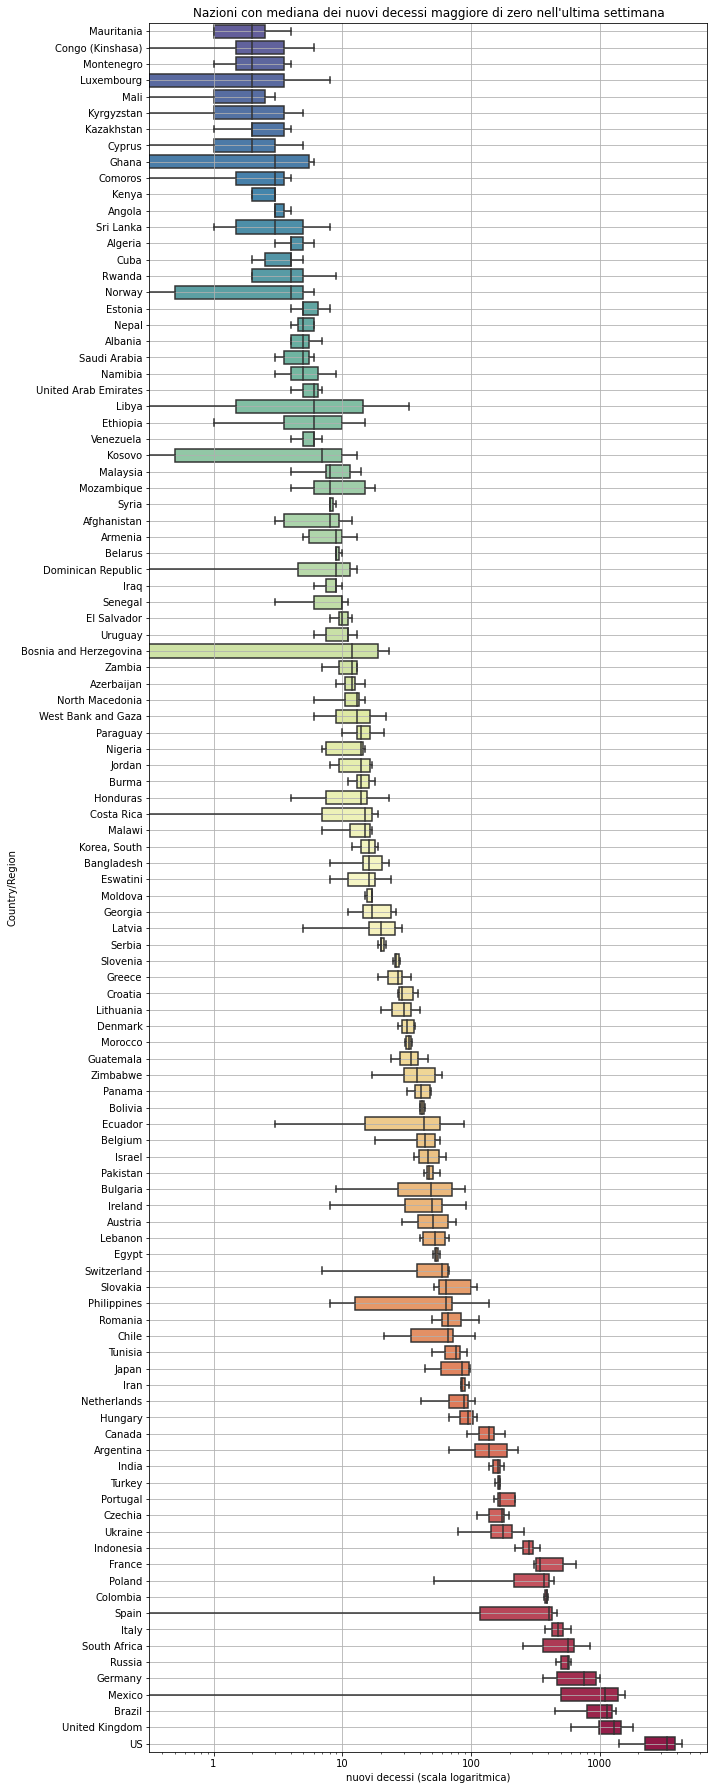

In [18]:
if _df_0.size:

    fig, ax = plt.subplots(figsize=(10, max(2, _df_0['Country/Region'].unique().size*.3)))

    g = sns.boxplot(
        data=_df_0,
        orient='h',
        x='value', y='Country/Region',
        palette="Spectral_r",
        showfliers=False,
        ax=ax
    )

    ax.set_xscale('log')
    ax.set_xticks([1, 10, 100, 1000])
    ax.set_xticklabels(['1', '10', '100', '1000'])

    ax.set_xlabel("nuovi decessi (scala logaritmica)")
    ax.set_title("Nazioni con mediana dei nuovi decessi maggiore di zero nell'ultima settimana")

    ax.grid()

***

# tra 1 e 10


Nazioni: 37 su 192
(19.3%)
    

IN ORDINE per nazione:


<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>value</th>
    </tr>
    <tr>
      <th>Country/Region</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Afghanistan</th>
      <td>8.0</td>
    </tr>
    <tr>
      <th>Albania</th>
      <td>5.0</td>
    </tr>
    <tr>
      <th>Algeria</th>
      <td>4.0</td>
    </tr>
    <tr>
      <th>Angola</th>
      <td>3.0</td>
    </tr>
    <tr>
      <th>Armenia</th>
      <td>9.0</td>
    </tr>
    <tr>
      <th>Belarus</th>
      <td>9.0</td>
    </tr>
    <tr>
      <th>Comoros</th>
      <td>3.0</td>
    </tr>
    <tr>
      <th>Congo (Kinshasa)</th>
      <td>2.0</td>
    </tr>
    <tr>
      <th>Cuba</th>
      <td>4.0</td>
    </tr>
    <tr>
      <th>Cyprus</th>
      <td>2.0</td>
    </tr>
    <tr>
      <th>Dominican Republic</th>
      <td>9.0</td>
    </tr>
    <tr>
      <th>El Salvador</th>
      <td>10.0</td>
    </tr>
    <tr>
      <th>Estonia</th>
      <td>5.0</td>
    </tr>
    <tr>
      <th>Ethiopia</th>
      <td>6.0</td>
    </tr>
    <tr>
      <th>Ghana</th>
      <td>3.0</td>
    </tr>
    <tr>
      <th>Iraq</th>
      <td>9.0</td>
    </tr>
    <tr>
      <th>Kazakhstan</th>
      <td>2.0</td>
    </tr>
    <tr>
      <th>Kenya</th>
      <td>3.0</td>
    </tr>
    <tr>
      <th>Kosovo</th>
      <td>7.0</td>
    </tr>
    <tr>
      <th>Kyrgyzstan</th>
      <td>2.0</td>
    </tr>
    <tr>
      <th>Libya</th>
      <td>6.0</td>
    </tr>
    <tr>
      <th>Luxembourg</th>
      <td>2.0</td>
    </tr>
    <tr>
      <th>Malaysia</th>
      <td>8.0</td>
    </tr>
    <tr>
      <th>Mali</th>
      <td>2.0</td>
    </tr>
    <tr>
      <th>Mauritania</th>
      <td>2.0</td>
    </tr>
    <tr>
      <th>Montenegro</th>
      <td>2.0</td>
    </tr>
    <tr>
      <th>Mozambique</th>
      <td>8.0</td>
    </tr>
    <tr>
      <th>Namibia</th>
      <td>5.0</td>
    </tr>
    <tr>
      <th>Nepal</th>
      <td>5.0</td>
    </tr>
    <tr>
      <th>Norway</th>
      <td>4.0</td>
    </tr>
    <tr>
      <th>Rwanda</th>
      <td>4.0</td>
    </tr>
    <tr>
      <th>Saudi Arabia</th>
      <td>5.0</td>
    </tr>
    <tr>
      <th>Senegal</th>
      <td>10.0</td>
    </tr>
    <tr>
      <th>Sri Lanka</th>
      <td>3.0</td>
    </tr>
    <tr>
      <th>Syria</th>
      <td>8.0</td>
    </tr>
    <tr>
      <th>United Arab Emirates</th>
      <td>6.0</td>
    </tr>
    <tr>
      <th>Venezuela</th>
      <td>6.0</td>
    </tr>
  </tbody>
</table>

IN ORDINE per mediana:


<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>value</th>
    </tr>
    <tr>
      <th>Country/Region</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Montenegro</th>
      <td>2.0</td>
    </tr>
    <tr>
      <th>Mali</th>
      <td>2.0</td>
    </tr>
    <tr>
      <th>Kyrgyzstan</th>
      <td>2.0</td>
    </tr>
    <tr>
      <th>Luxembourg</th>
      <td>2.0</td>
    </tr>
    <tr>
      <th>Mauritania</th>
      <td>2.0</td>
    </tr>
    <tr>
      <th>Cyprus</th>
      <td>2.0</td>
    </tr>
    <tr>
      <th>Congo (Kinshasa)</th>
      <td>2.0</td>
    </tr>
    <tr>
      <th>Kazakhstan</th>
      <td>2.0</td>
    </tr>
    <tr>
      <th>Ghana</th>
      <td>3.0</td>
    </tr>
    <tr>
      <th>Kenya</th>
      <td>3.0</td>
    </tr>
    <tr>
      <th>Sri Lanka</th>
      <td>3.0</td>
    </tr>
    <tr>
      <th>Angola</th>
      <td>3.0</td>
    </tr>
    <tr>
      <th>Comoros</th>
      <td>3.0</td>
    </tr>
    <tr>
      <th>Rwanda</th>
      <td>4.0</td>
    </tr>
    <tr>
      <th>Norway</th>
      <td>4.0</td>
    </tr>
    <tr>
      <th>Algeria</th>
      <td>4.0</td>
    </tr>
    <tr>
      <th>Cuba</th>
      <td>4.0</td>
    </tr>
    <tr>
      <th>Namibia</th>
      <td>5.0</td>
    </tr>
    <tr>
      <th>Estonia</th>
      <td>5.0</td>
    </tr>
    <tr>
      <th>Nepal</th>
      <td>5.0</td>
    </tr>
    <tr>
      <th>Saudi Arabia</th>
      <td>5.0</td>
    </tr>
    <tr>
      <th>Albania</th>
      <td>5.0</td>
    </tr>
    <tr>
      <th>Libya</th>
      <td>6.0</td>
    </tr>
    <tr>
      <th>Ethiopia</th>
      <td>6.0</td>
    </tr>
    <tr>
      <th>United Arab Emirates</th>
      <td>6.0</td>
    </tr>
    <tr>
      <th>Venezuela</th>
      <td>6.0</td>
    </tr>
    <tr>
      <th>Kosovo</th>
      <td>7.0</td>
    </tr>
    <tr>
      <th>Malaysia</th>
      <td>8.0</td>
    </tr>
    <tr>
      <th>Syria</th>
      <td>8.0</td>
    </tr>
    <tr>
      <th>Mozambique</th>
      <td>8.0</td>
    </tr>
    <tr>
      <th>Afghanistan</th>
      <td>8.0</td>
    </tr>
    <tr>
      <th>Iraq</th>
      <td>9.0</td>
    </tr>
    <tr>
      <th>Dominican Republic</th>
      <td>9.0</td>
    </tr>
    <tr>
      <th>Belarus</th>
      <td>9.0</td>
    </tr>
    <tr>
      <th>Armenia</th>
      <td>9.0</td>
    </tr>
    <tr>
      <th>El Salvador</th>
      <td>10.0</td>
    </tr>
    <tr>
      <th>Senegal</th>
      <td>10.0</td>
    </tr>
  </tbody>
</table>

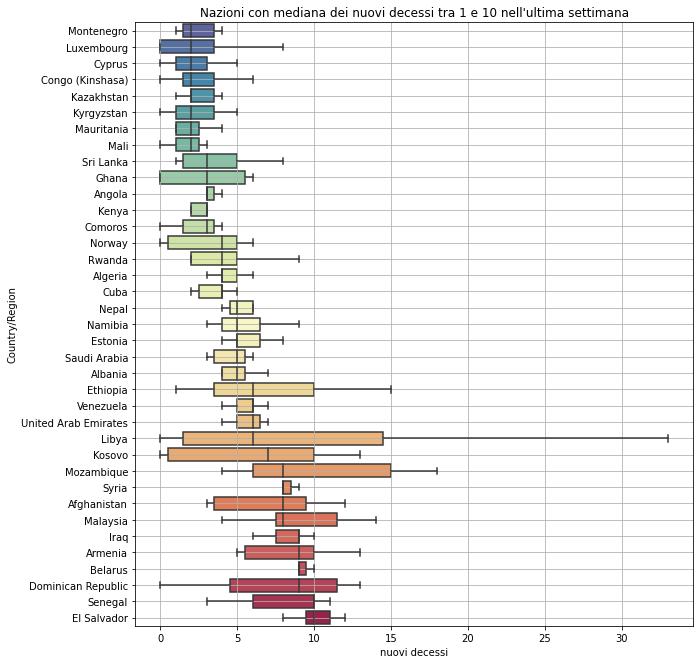

***

# tra 10 e 100


Nazioni: 49 su 192
(25.5%)
    

IN ORDINE per nazione:


<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>value</th>
    </tr>
    <tr>
      <th>Country/Region</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Austria</th>
      <td>51.0</td>
    </tr>
    <tr>
      <th>Azerbaijan</th>
      <td>12.0</td>
    </tr>
    <tr>
      <th>Bangladesh</th>
      <td>16.0</td>
    </tr>
    <tr>
      <th>Belgium</th>
      <td>44.0</td>
    </tr>
    <tr>
      <th>Bolivia</th>
      <td>42.0</td>
    </tr>
    <tr>
      <th>Bosnia and Herzegovina</th>
      <td>12.0</td>
    </tr>
    <tr>
      <th>Bulgaria</th>
      <td>49.0</td>
    </tr>
    <tr>
      <th>Burma</th>
      <td>14.0</td>
    </tr>
    <tr>
      <th>Chile</th>
      <td>66.0</td>
    </tr>
    <tr>
      <th>Costa Rica</th>
      <td>15.0</td>
    </tr>
    <tr>
      <th>Croatia</th>
      <td>29.0</td>
    </tr>
    <tr>
      <th>Denmark</th>
      <td>32.0</td>
    </tr>
    <tr>
      <th>Ecuador</th>
      <td>43.0</td>
    </tr>
    <tr>
      <th>Egypt</th>
      <td>54.0</td>
    </tr>
    <tr>
      <th>Eswatini</th>
      <td>16.0</td>
    </tr>
    <tr>
      <th>Georgia</th>
      <td>17.0</td>
    </tr>
    <tr>
      <th>Greece</th>
      <td>27.0</td>
    </tr>
    <tr>
      <th>Guatemala</th>
      <td>34.0</td>
    </tr>
    <tr>
      <th>Honduras</th>
      <td>14.0</td>
    </tr>
    <tr>
      <th>Hungary</th>
      <td>95.0</td>
    </tr>
    <tr>
      <th>Iran</th>
      <td>86.0</td>
    </tr>
    <tr>
      <th>Ireland</th>
      <td>50.0</td>
    </tr>
    <tr>
      <th>Israel</th>
      <td>46.0</td>
    </tr>
    <tr>
      <th>Japan</th>
      <td>85.0</td>
    </tr>
    <tr>
      <th>Jordan</th>
      <td>14.0</td>
    </tr>
    <tr>
      <th>Korea, South</th>
      <td>16.0</td>
    </tr>
    <tr>
      <th>Latvia</th>
      <td>20.0</td>
    </tr>
    <tr>
      <th>Lebanon</th>
      <td>53.0</td>
    </tr>
    <tr>
      <th>Lithuania</th>
      <td>30.0</td>
    </tr>
    <tr>
      <th>Malawi</th>
      <td>15.0</td>
    </tr>
    <tr>
      <th>Moldova</th>
      <td>17.0</td>
    </tr>
    <tr>
      <th>Morocco</th>
      <td>33.0</td>
    </tr>
    <tr>
      <th>Netherlands</th>
      <td>89.0</td>
    </tr>
    <tr>
      <th>Nigeria</th>
      <td>14.0</td>
    </tr>
    <tr>
      <th>North Macedonia</th>
      <td>13.0</td>
    </tr>
    <tr>
      <th>Pakistan</th>
      <td>47.0</td>
    </tr>
    <tr>
      <th>Panama</th>
      <td>41.0</td>
    </tr>
    <tr>
      <th>Paraguay</th>
      <td>14.0</td>
    </tr>
    <tr>
      <th>Philippines</th>
      <td>64.0</td>
    </tr>
    <tr>
      <th>Romania</th>
      <td>66.0</td>
    </tr>
    <tr>
      <th>Serbia</th>
      <td>20.0</td>
    </tr>
    <tr>
      <th>Slovakia</th>
      <td>64.0</td>
    </tr>
    <tr>
      <th>Slovenia</th>
      <td>26.0</td>
    </tr>
    <tr>
      <th>Switzerland</th>
      <td>60.0</td>
    </tr>
    <tr>
      <th>Tunisia</th>
      <td>76.0</td>
    </tr>
    <tr>
      <th>Uruguay</th>
      <td>11.0</td>
    </tr>
    <tr>
      <th>West Bank and Gaza</th>
      <td>13.0</td>
    </tr>
    <tr>
      <th>Zambia</th>
      <td>12.0</td>
    </tr>
    <tr>
      <th>Zimbabwe</th>
      <td>38.0</td>
    </tr>
  </tbody>
</table>

IN ORDINE per mediana:


<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>value</th>
    </tr>
    <tr>
      <th>Country/Region</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Uruguay</th>
      <td>11.0</td>
    </tr>
    <tr>
      <th>Azerbaijan</th>
      <td>12.0</td>
    </tr>
    <tr>
      <th>Zambia</th>
      <td>12.0</td>
    </tr>
    <tr>
      <th>Bosnia and Herzegovina</th>
      <td>12.0</td>
    </tr>
    <tr>
      <th>North Macedonia</th>
      <td>13.0</td>
    </tr>
    <tr>
      <th>West Bank and Gaza</th>
      <td>13.0</td>
    </tr>
    <tr>
      <th>Nigeria</th>
      <td>14.0</td>
    </tr>
    <tr>
      <th>Honduras</th>
      <td>14.0</td>
    </tr>
    <tr>
      <th>Paraguay</th>
      <td>14.0</td>
    </tr>
    <tr>
      <th>Jordan</th>
      <td>14.0</td>
    </tr>
    <tr>
      <th>Burma</th>
      <td>14.0</td>
    </tr>
    <tr>
      <th>Malawi</th>
      <td>15.0</td>
    </tr>
    <tr>
      <th>Costa Rica</th>
      <td>15.0</td>
    </tr>
    <tr>
      <th>Bangladesh</th>
      <td>16.0</td>
    </tr>
    <tr>
      <th>Korea, South</th>
      <td>16.0</td>
    </tr>
    <tr>
      <th>Eswatini</th>
      <td>16.0</td>
    </tr>
    <tr>
      <th>Georgia</th>
      <td>17.0</td>
    </tr>
    <tr>
      <th>Moldova</th>
      <td>17.0</td>
    </tr>
    <tr>
      <th>Latvia</th>
      <td>20.0</td>
    </tr>
    <tr>
      <th>Serbia</th>
      <td>20.0</td>
    </tr>
    <tr>
      <th>Slovenia</th>
      <td>26.0</td>
    </tr>
    <tr>
      <th>Greece</th>
      <td>27.0</td>
    </tr>
    <tr>
      <th>Croatia</th>
      <td>29.0</td>
    </tr>
    <tr>
      <th>Lithuania</th>
      <td>30.0</td>
    </tr>
    <tr>
      <th>Denmark</th>
      <td>32.0</td>
    </tr>
    <tr>
      <th>Morocco</th>
      <td>33.0</td>
    </tr>
    <tr>
      <th>Guatemala</th>
      <td>34.0</td>
    </tr>
    <tr>
      <th>Zimbabwe</th>
      <td>38.0</td>
    </tr>
    <tr>
      <th>Panama</th>
      <td>41.0</td>
    </tr>
    <tr>
      <th>Bolivia</th>
      <td>42.0</td>
    </tr>
    <tr>
      <th>Ecuador</th>
      <td>43.0</td>
    </tr>
    <tr>
      <th>Belgium</th>
      <td>44.0</td>
    </tr>
    <tr>
      <th>Israel</th>
      <td>46.0</td>
    </tr>
    <tr>
      <th>Pakistan</th>
      <td>47.0</td>
    </tr>
    <tr>
      <th>Bulgaria</th>
      <td>49.0</td>
    </tr>
    <tr>
      <th>Ireland</th>
      <td>50.0</td>
    </tr>
    <tr>
      <th>Austria</th>
      <td>51.0</td>
    </tr>
    <tr>
      <th>Lebanon</th>
      <td>53.0</td>
    </tr>
    <tr>
      <th>Egypt</th>
      <td>54.0</td>
    </tr>
    <tr>
      <th>Switzerland</th>
      <td>60.0</td>
    </tr>
    <tr>
      <th>Slovakia</th>
      <td>64.0</td>
    </tr>
    <tr>
      <th>Philippines</th>
      <td>64.0</td>
    </tr>
    <tr>
      <th>Romania</th>
      <td>66.0</td>
    </tr>
    <tr>
      <th>Chile</th>
      <td>66.0</td>
    </tr>
    <tr>
      <th>Tunisia</th>
      <td>76.0</td>
    </tr>
    <tr>
      <th>Japan</th>
      <td>85.0</td>
    </tr>
    <tr>
      <th>Iran</th>
      <td>86.0</td>
    </tr>
    <tr>
      <th>Netherlands</th>
      <td>89.0</td>
    </tr>
    <tr>
      <th>Hungary</th>
      <td>95.0</td>
    </tr>
  </tbody>
</table>

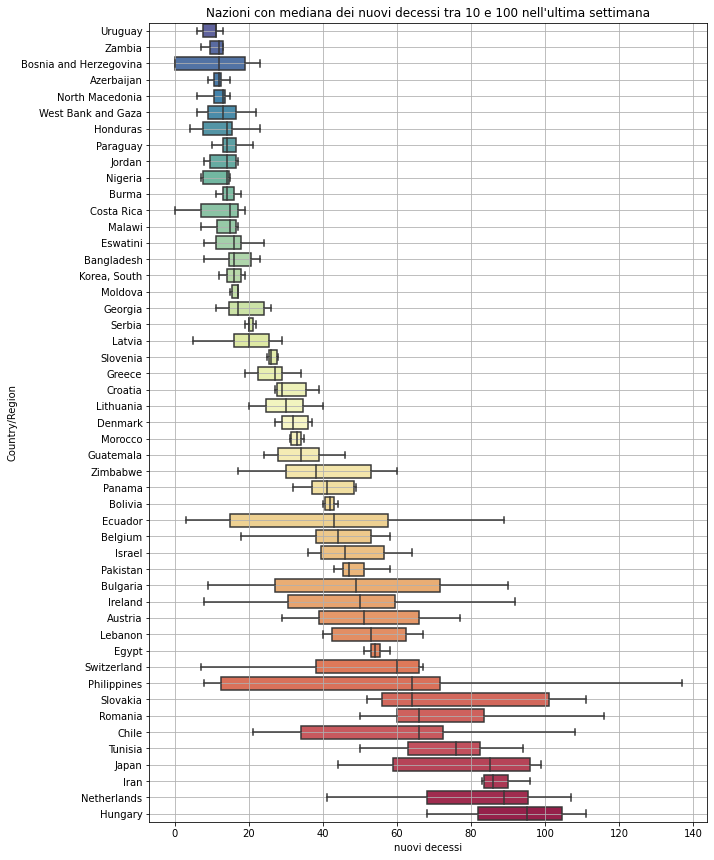

***

# tra 100 e 1000


Nazioni: 16 su 192
(8.3%)
    

IN ORDINE per nazione:


<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>value</th>
    </tr>
    <tr>
      <th>Country/Region</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Argentina</th>
      <td>139.0</td>
    </tr>
    <tr>
      <th>Canada</th>
      <td>137.0</td>
    </tr>
    <tr>
      <th>Colombia</th>
      <td>388.0</td>
    </tr>
    <tr>
      <th>Czechia</th>
      <td>173.0</td>
    </tr>
    <tr>
      <th>France</th>
      <td>347.0</td>
    </tr>
    <tr>
      <th>Germany</th>
      <td>759.0</td>
    </tr>
    <tr>
      <th>India</th>
      <td>161.0</td>
    </tr>
    <tr>
      <th>Indonesia</th>
      <td>283.0</td>
    </tr>
    <tr>
      <th>Italy</th>
      <td>477.0</td>
    </tr>
    <tr>
      <th>Poland</th>
      <td>369.0</td>
    </tr>
    <tr>
      <th>Portugal</th>
      <td>167.0</td>
    </tr>
    <tr>
      <th>Russia</th>
      <td>573.0</td>
    </tr>
    <tr>
      <th>South Africa</th>
      <td>566.0</td>
    </tr>
    <tr>
      <th>Spain</th>
      <td>404.0</td>
    </tr>
    <tr>
      <th>Turkey</th>
      <td>165.0</td>
    </tr>
    <tr>
      <th>Ukraine</th>
      <td>179.0</td>
    </tr>
  </tbody>
</table>

IN ORDINE per mediana:


<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>value</th>
    </tr>
    <tr>
      <th>Country/Region</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Canada</th>
      <td>137.0</td>
    </tr>
    <tr>
      <th>Argentina</th>
      <td>139.0</td>
    </tr>
    <tr>
      <th>India</th>
      <td>161.0</td>
    </tr>
    <tr>
      <th>Turkey</th>
      <td>165.0</td>
    </tr>
    <tr>
      <th>Portugal</th>
      <td>167.0</td>
    </tr>
    <tr>
      <th>Czechia</th>
      <td>173.0</td>
    </tr>
    <tr>
      <th>Ukraine</th>
      <td>179.0</td>
    </tr>
    <tr>
      <th>Indonesia</th>
      <td>283.0</td>
    </tr>
    <tr>
      <th>France</th>
      <td>347.0</td>
    </tr>
    <tr>
      <th>Poland</th>
      <td>369.0</td>
    </tr>
    <tr>
      <th>Colombia</th>
      <td>388.0</td>
    </tr>
    <tr>
      <th>Spain</th>
      <td>404.0</td>
    </tr>
    <tr>
      <th>Italy</th>
      <td>477.0</td>
    </tr>
    <tr>
      <th>South Africa</th>
      <td>566.0</td>
    </tr>
    <tr>
      <th>Russia</th>
      <td>573.0</td>
    </tr>
    <tr>
      <th>Germany</th>
      <td>759.0</td>
    </tr>
  </tbody>
</table>

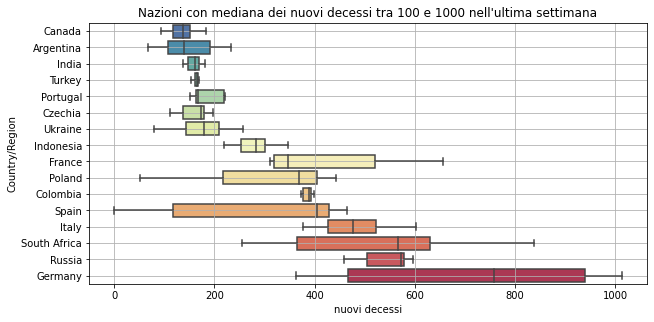

***

# superiore a 1000+


Nazioni: 4 su 192
(2.1%)
    

IN ORDINE per nazione:


<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>value</th>
    </tr>
    <tr>
      <th>Country/Region</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Brazil</th>
      <td>1151.0</td>
    </tr>
    <tr>
      <th>Mexico</th>
      <td>1106.0</td>
    </tr>
    <tr>
      <th>US</th>
      <td>3352.0</td>
    </tr>
    <tr>
      <th>United Kingdom</th>
      <td>1296.0</td>
    </tr>
  </tbody>
</table>

IN ORDINE per mediana:


<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>value</th>
    </tr>
    <tr>
      <th>Country/Region</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Mexico</th>
      <td>1106.0</td>
    </tr>
    <tr>
      <th>Brazil</th>
      <td>1151.0</td>
    </tr>
    <tr>
      <th>United Kingdom</th>
      <td>1296.0</td>
    </tr>
    <tr>
      <th>US</th>
      <td>3352.0</td>
    </tr>
  </tbody>
</table>

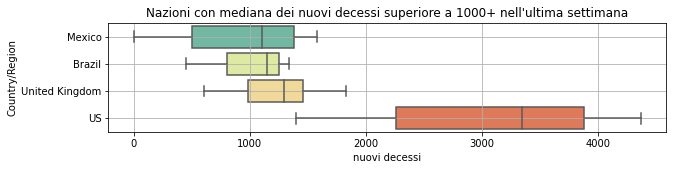

***

In [19]:
nums = [1, 10, 100, 1000, '1000+']

for i, num in enumerate(nums):
    
    if not i:
        continue
    
    if num != '1000+':
        range_txt = f"tra {nums[i-1]} e {num}"
    else:
        range_txt = f"superiore a {num}"
    
    display(Markdown(f"# {range_txt}"))

    _df = ctd_last_week[ctd_last_week['cat']==num].sort_values(by='median')
    
    perc = _df['Country/Region'].unique().size / ctd_last_week['Country/Region'].unique().size
    display(Markdown(f"""
Nazioni: {_df['Country/Region'].unique().size} su {ctd_last_week['Country/Region'].unique().size}
({perc:.1%})
    """))
    
    print("IN ORDINE per nazione:")
    display(Markdown(
        _df.groupby('Country/Region')[['value']].median().sort_values(by='Country/Region').to_html()
    ))
    
    print("IN ORDINE per mediana:")
    display(Markdown(
        _df.groupby('Country/Region')[['value']].median().sort_values(by='value').to_html()
    ))

    if _df.size:
        fig, ax = plt.subplots(figsize=(10, max(2, _df['Country/Region'].unique().size*.3)))

        g = sns.boxplot(
            data=_df,
            orient='h',
            x='value', y='Country/Region',
            palette="Spectral_r",
            showfliers=False,
            ax=ax
        )
        g.set_xlabel("nuovi decessi")
        g.set_title(f"Nazioni con mediana dei nuovi decessi {range_txt} nell'ultima settimana")
        g.grid()
        plt.show()
        plt.close(fig='all')
    
    display(Markdown("***"))